In [1]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0' :
  raise SystemError ('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Librairies

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import numpy as np

# MNIST fashion

In [3]:
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical

In [4]:
dataset = keras.datasets.fashion_mnist
(img_train, label_train),(img_test,label_test) = dataset.load_data()

# conversion des images en float
img_train=img_train/255.0
img_test=img_test/255.0
output_train=keras.utils.to_categorical(label_train, num_classes=10)
output_test=keras.utils.to_categorical(label_test, num_classes=10)
print(img_train.shape)
print(img_test.shape)

(60000, 28, 28)
(10000, 28, 28)


*Nous obtenons respectivement 60 000 et 10 000 images 2D de 28x28 pixels.*

*On ajoute donc
les instructions suivantes pour ajouter une dimension à nos images*

In [5]:
img_train2 = np.expand_dims(img_train, axis=-1)
img_test2 = np.expand_dims(img_test, axis=-1)

print(img_train2.shape)
print(img_test2.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


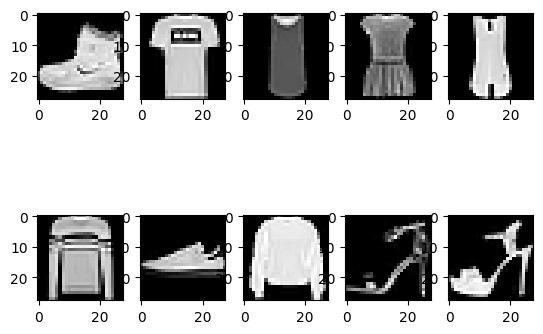

In [6]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(img_train[i], cmap='gray')

plt.show()

In [7]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(16,(3,3) ,activation = "relu",input_shape=(28,28,1)))

keras.layers.MaxPool2D((2,2))

model.add(keras.layers.Conv2D(32,(3,3) ,activation = "relu"))

keras.layers.MaxPool2D((2,2))

model.add(keras.layers.Conv2D(64,(3,3) ,activation = "relu"))

model.add(keras.layers.Flatten(input_shape=(28,28,1)))

model.add(keras.layers.Dense(512,activation = "relu"))

model.add(keras.layers.Dense(512,activation = "relu"))

model.add(keras.layers.Dense(10,activation = "relu"))

# on affiche la structure

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      15,860,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,151,306 (61.61 MB)

 Trainable params: 16,151,306 (61.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
loss = keras.losses.CategoricalCrossentropy()
optimizer = Adam(learning_rate=0.001)

model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

In [9]:
model.fit(img_train, output_train, batch_size=16, epochs=20, shuffle= True, verbose=2)

Epoch 1/20
3750/3750 - 24s - 6ms/step - accuracy: 0.4832 - loss: nan
Epoch 2/20
3750/3750 - 38s - 10ms/step - accuracy: 0.5315 - loss: nan
Epoch 3/20
3750/3750 - 19s - 5ms/step - accuracy: 0.6053 - loss: nan
Epoch 4/20
3750/3750 - 20s - 5ms/step - accuracy: 0.6167 - loss: nan
Epoch 5/20
3750/3750 - 21s - 6ms/step - accuracy: 0.6203 - loss: nan
Epoch 6/20
3750/3750 - 20s - 5ms/step - accuracy: 0.6141 - loss: nan
Epoch 7/20
3750/3750 - 20s - 5ms/step - accuracy: 0.6270 - loss: nan
Epoch 8/20
3750/3750 - 20s - 5ms/step - accuracy: 0.6353 - loss: nan
Epoch 9/20
3750/3750 - 20s - 5ms/step - accuracy: 0.6524 - loss: nan
Epoch 10/20
3750/3750 - 21s - 6ms/step - accuracy: 0.6492 - loss: nan
Epoch 11/20
3750/3750 - 21s - 6ms/step - accuracy: 0.6534 - loss: nan
Epoch 12/20
3750/3750 - 19s - 5ms/step - accuracy: 0.6557 - loss: nan
Epoch 13/20
3750/3750 - 21s - 6ms/step - accuracy: 0.6594 - loss: 5.0126
Epoch 14/20
3750/3750 - 19s - 5ms/step - accuracy: 0.6643 - loss: nan
Epoch 15/20
3750/3750 - 2

In [10]:
model.evaluate(img_test2, output_test, batch_size=16, verbose=2)

625/625 - 2s - 3ms/step - accuracy: 0.6690 - loss: 4.9953


[4.995344638824463, 0.6690000295639038]